<a href="https://colab.research.google.com/github/carloscarvajal1cc/UTS_MachineLearning_Assigment2/blob/carlos/Assigment2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: titulo aqui






<br>32513 Machine Learning Spring 2019
<br>By Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>and Andres Felipe Lagos Rodriguez. Student ID: 13092248
    




trying a new change

# Abstract



<p align="justify"> 

---
### index 


---



# I. Introduction
<br><p align="justify"> Define Problem; Justify
Significance W-200**

# II. Exploration

<br><p align="justify"> identify challenges; design data structures, plan data models and tests (300)


# III. Methodology
<br>
<p align="justify"> Implement algorithms; build and train data models (300 words)

# IV. Evaluation
<br>
<p align="justify"> Report execution on data, perform and report testing,
perform efficiency analysis, do possible comparative analysis 200 words.

# V.	Conclusion

<br><p align="justify"> Discuss reflections, proppose possible improvements.
 




# VI.	Ethical Discussion

<br><p align="justify"> 
  {The report includes discussions about the social/ethical aspect of the proposed technique/
project. You can adopt one or more ethical models, such as the utilitarian approach or the
Kantian duty-based approach. You should anticipate the potential misuses of your technique. }

# VII.	References.





The report is clearly structured and well written.

The practical problem is well-motivated with clear practical significance. The design/planning
of the research/development is clear and logical, including considerations about data
acquisition, quality control, modelling techniques, evaluation method and criteria, etc.
The design of data models and experiments is logical. The implementation is correct, efficient
and practically complete (comparing, or at least, considering alternatives). The evaluation
report is convincing; the implementation of the experiments can be easily accessed from a
cloud-based service such as Github and replicated for assessment

# VIII. Draft and experimenting section

<br><p align="justify"> This section is designed to experiment and try to reinforce the authors claim or to show some of the aspects that were recomended for improvement, by using the technology capacity of today.

<br><p align="justify"> First, lets import a series of packages that will help developing the analysis:

## VIII.I. Importing the dataset 

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip -uq "/content/drive/My Drive/skindata" -d "/content/drive/My Drive/skindata"

In [129]:
import os
print("Verifying access to the folder containing the images in Google Drive...")
print(os.listdir('/content/drive/My Drive/skindata/train/malignant'))

Verifying access to the folder containing the images in Google Drive...
['1445.jpg', '117.jpg', '1243.jpg', '863.jpg', '489.jpg', '1077.jpg', '1162.jpg', '942.jpg', '805.jpg', '1068.jpg', '125.jpg', '1179.jpg', '1343.jpg', '921.jpg', '989.jpg', '978.jpg', '544.jpg', '961.jpg', '966.jpg', '225.jpg', '690.jpg', '1473.jpg', '223.jpg', '1132.jpg', '365.jpg', '700.jpg', '649.jpg', '235.jpg', '56.jpg', '1047.jpg', '1376.jpg', '899.jpg', '319.jpg', '1214.jpg', '1103.jpg', '1253.jpg', '444.jpg', '76.jpg', '1314.jpg', '75.jpg', '1182.jpg', '410.jpg', '51.jpg', '136.jpg', '281.jpg', '1062.jpg', '1222.jpg', '695.jpg', '1093.jpg', '664.jpg', '810.jpg', '1082.jpg', '712.jpg', '1260.jpg', '731.jpg', '812.jpg', '595.jpg', '143.jpg', '1340.jpg', '723.jpg', '1042.jpg', '263.jpg', '1044.jpg', '516.jpg', '386.jpg', '698.jpg', '920.jpg', '118.jpg', '779.jpg', '646.jpg', '177.jpg', '999.jpg', '530.jpg', '883.jpg', '63.jpg', '1439.jpg', '12.jpg', '150.jpg', '1413.jpg', '740.jpg', '1350.jpg', '1171.jpg', '35

In [0]:
from pathlib import Path
from google.colab import drive

DATA_FILENAME = "skindata"

data_dir = Path('./content/drive/My Drive/skindata/')
data_dir.mkdir(parents=True, exist_ok=True) 
filepath = data_dir / DATA_FILENAME

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1VYOQ-wOo-KMqPgKA4b5pl4xoNzE2YbX2'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(str(filepath))

In [6]:
import skimage
import numpy as np
import pandas as pd
import random as rd

import torch.utils.data
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
import torchvision
import torchvision.transforms as transforms

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

from sklearn.preprocessing import normalize
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools
from skimage.io import imread
from skimage.transform import resize
import keras
from keras.utils.np_utils import to_categorical

from time import time
import logging

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import tree

from sklearn. ensemble import  BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential



Using TensorFlow backend.


## VIII.I.II Loading the dataset with Pytorch.

In this section we will use Pytorch to load the images. This Scientific computing package boosts the speed by allowing us to use the power of GPUs. This will enable us to develop neural networks to construct a classifier that identifies when a mole is benign or malignant. 

Thus, lets import the datasets by using the functions Dataloader.

In [0]:
tr_data = datasets.ImageFolder('/content/drive/My Drive/skindata/train/', transform=ToTensor())
validation_data = datasets.ImageFolder('/content/drive/My Drive/skindata/test/', transform=ToTensor())

tr_dataload = torch.utils.data.DataLoader(tr_data, batch_size= 2637, shuffle = True)
validation_dataload = torch.utils.data.DataLoader(validation_data, batch_size= 660, shuffle = True)

Once the torch tensors have been created and the images have been load in the two tensors, we will shuffle the order and assign images to the tensor describing the images and labels for the tensor describing the labels, respectively for each set. Additionally we will define the classes as Benign and Malignant.

In [0]:
dataiter = iter(tr_dataload)
images, labels = dataiter.next()

valiter = iter(validation_dataload)
vimages, vlabels = valiter.next()

# Definign the classes

classes = ('Benign','Malignant')

In [133]:
print("The training data is represented by a tensor that works similarly to a numpy ndarray")
print("The tensor containing the training data is:", images.shape, labels)
print("Similarly happens with the validation test")
print("The tensor containing the validation data is:",vimages.shape, vlabels.shape)

The training data is represented by a tensor that works similarly to a numpy ndarray
The tensor containing the training data is: torch.Size([2637, 3, 224, 224]) tensor([0, 1, 0,  ..., 1, 1, 1])
Similarly happens with the validation test
The tensor containing the validation data is: torch.Size([660, 3, 224, 224]) torch.Size([660])


Once the dataset is in torch format, it is possible to plot the images by transposing the matrixes to a format  2637, 224,224,3. Where 2637 represents the number of images in the training set; 224 by 224 represents the number of pixels and 3 the RGB colors.

The following picture corresponds to a Malignant mole


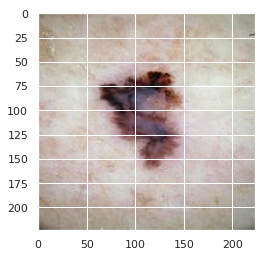

In [134]:
n=5
plt.imshow(np.transpose(images[n]))
print("The following picture corresponds to a {} mole".format(classes[labels[n]]))

###  VIII.I.II.I Alternative for loading images

The following procedure corresponds to the same process performed before to upload images. As the File has two folders, one contains a trainset and the other as testing set. This has been preset by kaggle, so in this case we are going to take the training set and split it into a training and testing and we are goint to take the test file as a validation set for a final evaluation of our model.

First, it is required to convert the data to RGB and label them

In [0]:
FileBenignTrain = '/content/drive/My Drive/skindata/train/benign'
FileMalignTrain = '/content/drive/My Drive/skindata/train/malignant'

FileBenignTest = '/content/drive/My Drive/skindata/test/benign'
FileMalignTest = '/content/drive/My Drive/skindata/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

Now, we will load the training set 

In [0]:
BeningImages = [read(os.path.join(FileBenignTrain, filename)) for
              filename in os.listdir(FileBenignTrain)]
XBening = np.array(BeningImages, dtype='uint8')


MalignantImages = [read(os.path.join(FileMalignTrain, filename)) for
                 filename in os.listdir(FileMalignTrain)]
XMalignant = np.array(MalignantImages, dtype='uint8')

# we will load the testing pictures as a testing set

BeningImages = [read(os.path.join(FileBenignTest, filename)) for
              filename in os.listdir(FileBenignTest)]
XBeningTest = np.array(BeningImages, dtype='uint8')
MalignantImages = [read(os.path.join(FileMalignTest, filename)) for
                 filename in os.listdir(FileMalignTest)]
XMalignantTest = np.array(MalignantImages, dtype='uint8')

In [0]:
# Now lets check the shape of our arrays
# Different to the Torch tensors performed before
XBening.shape

(1440, 224, 224, 3)

The XBening array contains 1440 images with size 224x224 using the RGB colors.

Let's give labels to the images by assgining zero when the classification is Bening(0) and ones when the classification is Malignant(1). Thus, the set XBening will have a correspondant array YBening with values zeros for each one of the observations. This is why the size of the first element of the array XBening or in other words XBening[0] will determine the size of the zero array representing the labels as YBening. 

Equally it applies for XMalignant(1) and the testing sets.

In [0]:
YBening = np.empty(XBening.shape[0], dtype = str)
for i in range(XBening.shape[0]):
  YBening[i]="Bening"
YMalignant = np.empty(XMalignant.shape[0], dtype = str)
for i in range(XMalignant.shape[0]):
  YMalignant[i]="Malignant"


YBeningTest = np.empty(XBeningTest.shape[0], dtype = str)
for i in range(XBeningTest.shape[0]):
  YBeningTest[i]="Bening"
YMalignantTest = np.empty(XMalignantTest.shape[0], dtype = str)
for i in range(XMalignantTest.shape[0]):
  YMalignantTest[i]="Malignant"

In [0]:
print("The shape of the XMalignant array is: {}".format(XMalignant.shape))
print("the number of observations in this array is {}".format(XMalignant.shape[0]))
print("Which has to have the same number of labels represented by the YMalignant array whose shape is {}"
      .format(YMalignant.shape))

The shape of the XMalignant array is: (1197, 224, 224, 3)
the number of observations in this array is 1197
Which has to have the same number of labels represented by the YMalignant array whose shape is (1197,)


Let's plot the image and see the difference between malignant and bening skin moles

After building correspondant arrays with the classes for each image, we are going to merge the bening images and malignant images creating a train set and a testing set respectively, and we will do the same with the labels.

In [0]:
X_train = np.concatenate((XBening, XMalignant), axis = 0)
y_train = np.concatenate((YBening, YMalignant), axis = 0)

X_validation = np.concatenate((XBeningTest, XMalignantTest), axis = 0)
y_validation = np.concatenate((YBeningTest, YMalignantTest), axis = 0)

In [0]:
print("Thus, the training set will have a shape of {}".format(X_train.shape))
print("And the testing set will have a shape of {}".format(X_test.shape))

Thus, the training set will have a shape of (2637, 224, 224, 3)
And the testing set will have a shape of (660, 224, 224, 3)


With this methodology we achieve the same shape as the torch tensors. However the matrixes here are transposed, having the RGB colors as the last axis in the array. 

On the other hand, in order to prevent bias in the model we are going to shuffle the data.

In [0]:
shuffled = np.arange(X_train.shape[0])
np.random.shuffle(shuffled)
X_train = X_train[shuffled]
y_train = y_train[shuffled]

shuffled = np.arange(X_test.shape[0])
np.random.shuffle(shuffled)
X_test = X_test[shuffled]
y_test = y_test[shuffled]

In [0]:
target_names= np.empty(2, dtype = str)



target_names[0] = 'Bening'
target_names[1] = 'Malignant'

target_names


array(['B', 'M'], dtype='<U1')

## VIII.I.II Processing and visualizing the data


Let's beging by visualizing the data from the numpy arrays. The following images show two clusters of benign and malignant moles taken directly from the folders Bening and Malignant.

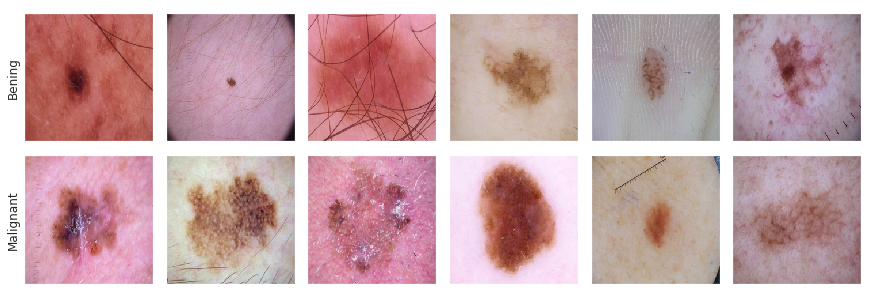

In [0]:
fig, ax = plt.subplots(2, 6, figsize=(15, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(6):
    ax[0, i].imshow(XBening[i])
    ax[1, i].imshow(XMalignant[i])
    
ax[0, 0].set_ylabel('Bening')
ax[1, 0].set_ylabel('Malignant');

Next we are going to define the framework of this project. We intent to create the best approach to find a classifier or a group of classifiers that will classigy benign and malignant moles in order to detect skin cancer.

First, we are going to transform the torch tensors to numpy arrays in order to train models using the sklearn library. Secondly we will use the torch tensors to train Neural Network models.

Lastly we will choose the 3 top algorithms with best performance and will create a Assamble method to get the algorithms to vote to find the best model predictor.

The training set will be split for training and testing and the test set will be used for validation at the end to compare evaluate the resulting model.

In [137]:
#Let's transform the tensor to a numpy array in order to work with the sklearn library

X_train = images.numpy().reshape([images.shape[0],-1])
X_train.shape

y_train = labels.numpy()
y_train.shape

(2637,)

In [0]:
X = X_train
y = y_train


#let's partition the data in 70/30 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)

In [140]:
X_train.shape

(1845, 150528)

In [0]:
OriginalXset = np.copy(X_train)
OriginalXtestset = np.copy(X_test)
Originalyset = np.copy(y_train)
Originalysettest = np.copy(y_test)

## VIII.III A simple classifier

In this section we are going to build a simple classifier and train it with the training set and will measure the time this takes. This exercise will serve as a reference point because subsequently we will develop methods to reduce the complexity of the data (by using PCA for example) so the model runs in less time and also will compare their performance. Let's start with a simple decision tree

In [142]:
target_names = np.array(classes)
target_names

array(['Benign', 'Malignant'], dtype='<U9')

In [32]:
print("Training the classifier on the training set")

t0 = time()

clftree = tree.DecisionTreeClassifier()
clftree = clftree.fit(X_train, y_train)

print("Training the model took {}s".format(time() - t0))

Training the classifier on the training set
Training the model took 191.44110751152039s


Next, we are going to evaluate the model using the test set and comparing the results given by the model with the original labels.

In [50]:
print("Using the model on the test set to classify moles")
t0 = time()
y_pred = clftree.predict(X_test)
print("The time it takes to evaluate the test set is {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=(0,1)))

Using the model on the test set to classify moles
The time it takes to evaluate the test set is 0.14583659172058105s
              precision    recall  f1-score   support

      Benign       0.74      0.76      0.75       417
   Malignant       0.73      0.71      0.72       375

    accuracy                           0.74       792
   macro avg       0.74      0.73      0.73       792
weighted avg       0.74      0.74      0.74       792

[[318  99]
 [110 265]]


### Conclusion 1

The classifier took a lot of time to be trained with the training set because of the high complexity of the image data. As a single image has a dimensionality of 224 x 224 and it is adding colors in a third dimension with three colors RGB, the computational calculation is quite high. 

Our main goal is to reduce the complexity of the classifier and therefore our first approach is to implement Principal Components Analysis to reduce the number of Dimensions and therefore the complexity of the model.

## VIII.IV Principal Components Analysis

Due to the large number of components or dimensions found in the image, the performance of the algorithm gets affected by big calculations. In this section, we will implement PCA in order to reduce the number of components or dimensions in the image space, so the algorithm will perform less calculations and reduce its computational cost.

In [143]:
print("Reducing the number of components by using PCA...")

n_components = 791

t0 = time()

pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)

print('Reducing the number of components to {}, takes {}s'.format(n_components, time() - t0))
print('Hence, the new shape of the array will represent the dimentionality reduced image')
print('The size of the new array is {}'.format(X_train_pca.shape))

Reducing the number of components by using PCA...
Reducing the number of components to 791, takes 63.196455240249634s
Hence, the new shape of the array will represent the dimentionality reduced image
The size of the new array is (1845, 791)


Next, it is important to evaluate the cumulative explained variance of the components. To do this we plot the report of PCA using 791 components to visualize the cumulative variance of the first 791 component. This number corresponds to the condition n< min(X_test.shape())

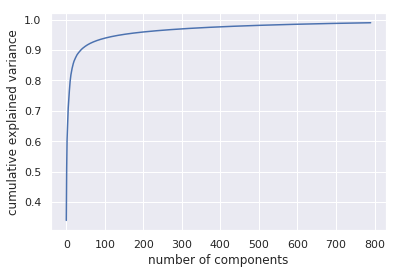

In [144]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As we can observed, the first 500 components explain the cumulative variance close to a 100% of the image, which indicates a much smaller number to train the models rather than the initial 150.528 components.

Following, we are going to reconstruct the images in order to see the difference between a full image (Including all the components) and a dimentionality reduced image(Only with the first 500 components)

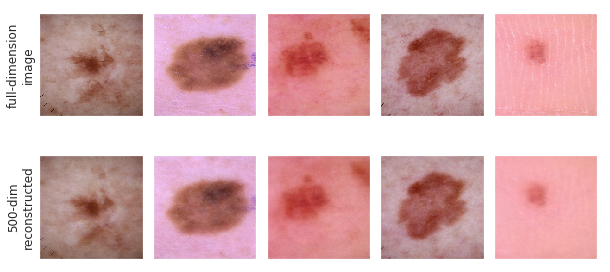

In [145]:
#Let's start by transforming the array with shape (1845,500) back to 
#(1845,150528 )

projected = pca.inverse_transform(X_train_pca)

#and plot the comparison between a full image vs a reconstructed image
fig, ax = plt.subplots(2, 5, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(np.transpose(X_train[i].reshape(3,224,224)))
    ax[1, i].imshow(np.transpose(projected[i].reshape(3,224,224)))
    
ax[0, 0].set_ylabel('full-dimension\nimage')
ax[1, 0].set_ylabel('500-dim\nreconstructed');

Now we will compare the performance of the same classifier but this time using less components. Let's first start by reducing the components of the test set

In [0]:
# reducing the components in the testing set.

X_test_pca = pca.fit_transform(X_test)

In [97]:
print("Training the classifier on the training set")

t0 = time()

clftree = tree.DecisionTreeClassifier()
clftree = clftree.fit(X_train_pca, y_train)

print("Training the model took {}s".format(time() - t0))

Training the classifier on the training set
Training the model took 1.3094594478607178s


The classifier took less time in being trained, only 1.3 seconds. Now we will test the performance of the classifier by evaluating the test set.

In [98]:
print("Using the model on the test set to classify moles")
t0 = time()
y_pred = clftree.predict(X_test_pca)
print("The time it takes to evaluate the test set is {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=(0,1)))

Using the model on the test set to classify moles
The time it takes to evaluate the test set is 0.0015993118286132812s
              precision    recall  f1-score   support

      Benign       0.63      0.67      0.65       417
   Malignant       0.61      0.57      0.59       375

    accuracy                           0.62       792
   macro avg       0.62      0.62      0.62       792
weighted avg       0.62      0.62      0.62       792

[[280 137]
 [163 212]]


### Conclusion 2

The time the classifier takes to be trained takes with the data training data that has been dimentionality reduced is considerably less than with the full dimensions, due to the less computational cost that PCA generates. However, the accuracy of the classifier gets affected by this and, therefore this gives us an idea of the importance of many of the components. 

Following we are going to try different algorithms to seek for an improved accuracy, by using the power of PCA.

### VIII.IV.I Support Vector Machine

Following the support vector machine algorithm is implemented. The performance of the algorithm will be optimized by using the GridSearchCV function from the library Sklearn. This function optimizes the parameters by searching over specific values. Additionaly, in order to reduce the variance and overfitting problems it is intended to use bagging from now on, to improve the stability and accuracy of our classifiers.


In [117]:
print("Training SVM with training set")

t0 = time()

#List the parameters of SVD that will be evaluated in the model to find the best combination.

param_grid = {'C': [10,20,30,40,50],
              'gamma': [0.001, 0.002, 0.003], }



clfSVM = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)


clfSVM = clfSVM.fit(X_train_pca, y_train)

print("done in {}s".format(time() - t0))
print("Best estimator found by GridSearchCV:")
print(clfSVM.best_estimator_)

Training SVM with training set
done in 61.13149404525757s
Best estimator found by GridSearchCV:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [123]:
# Checking overfiting evaluating the training data.

print('The model explains {}% of the training data'.format(clfSVM.score(X_train_pca, y_train)*100))


The model explains 100.0% of the training data


Therefore there is a overfitting problem. Thus we use bagging to reduce the capability of the model of explaining the training data in a 100%. Bagging samples the training set over a specific porcentage of the total and repeats this process several times.

In [124]:
# Bagging

bg = BaggingClassifier(clfSVM, max_samples= 0.7, max_features = 1.0, n_estimators = 20)
bg.fit(X_train_pca, y_train)

print('The model now, explains {}% of the training data'.format(bg.score(X_train_pca, y_train)*100))

The model now, explains 95.71815718157181% of the training data


The model is not overfitted anymore and therefore we can perfomr an evaluation of the model with the test set.

In [125]:
print("Predicting skin cancer on the test set")
t0 = time()
y_pred = bg.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

Predicting skin cancer on the test set
done in 11.36689805984497s
              precision    recall  f1-score   support

      Benign       0.76      0.66      0.71       417
   Malignant       0.67      0.77      0.72       375

    accuracy                           0.71       792
   macro avg       0.72      0.71      0.71       792
weighted avg       0.72      0.71      0.71       792

[[277 140]
 [ 88 287]]


In [126]:
bg.score(X_test_pca, y_test)

0.7121212121212122

### VIII.IV.II Random Forest

The following section will train a random forest classifier, by applying ...

In [0]:
clfRF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [153]:
print("Training the Random Forest classifier with training set")

param_grid = {'n_estimators': (1000, 5000),
              'max_depth': (100, 200), }
clfRF = GridSearchCV(RandomForestClassifier(random_state=0),param_grid,cv=5, iid=False)
                  
clfRF = clfRF.fit(X_train_pca, y_train)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clfRF.best_estimator_)

Training the Random Forest classifier with training set
done in 1821.4327449798584s
Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [154]:
# Checking overfiting evaluating the training data.

print('The model explains {}% of the training data'.format(clfRF.score(X_train_pca, y_train)*100))

The model explains 100.0% of the training data


In [0]:
# Bagging

bg = BaggingClassifier(clfRF, max_samples= 0.7, max_features = 1.0, n_estimators = 20)
bg.fit(X_train_pca, y_train)

print('The model now, explains {}% of the training data'.format(bg.score(X_train_pca, y_train)*100))

In [155]:
print("Predicting Cancer moles on the test set")
t0 = time()
y_pred = bg.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Predicting Cancer moles on the test set
done in 0.21829485893249512s
              precision    recall  f1-score   support

      Benign       0.93      0.55      0.69       430
   Malignant       0.64      0.95      0.77       362

    accuracy                           0.74       792
   macro avg       0.79      0.75      0.73       792
weighted avg       0.80      0.74      0.73       792

[[238 192]
 [ 17 345]]


So far, Random Forest has been the best classifier in terms of accuracy, by also applying PCA to reduce the dimensions. Therefore, it is possible to visualize some sample images of the prediction given by the model and the real classification, as follow.

In [0]:
def Mole_Gallery(picture, titles, h, w, n_row=4, n_col=4):
    plt.figure(figsize=(2 * n_col, 2.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(picture[i].reshape((h, w)))
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        
#test set prediction plotting

def title(y_pred, y_test, target_names, i):
    prediction = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    real = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Real Classification: \n{}\nPrediction:\n{}'.format(real, prediction)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

Testprojected = pca.inverse_transform(X_test_pca)
A = np.transpose(Testprojected[i].reshape(3,224,224)

Mole_Gallery(A, prediction_titles, h, w)

### Conclusion 3.

As this is cancer data, we can observe that the pixels play a big role and therefore they must be considered in the model. then PCA is not a recomendable solution because of the loss of certain information when reducing the number of components. then we are going to use convolutional neural network so it does the evaluation of the data and decides on the pixels that are important for cancer detection.

### Assemble classifier

## VIII.V. Convolutional Neural Network


In [0]:
import tensorflow as tf


from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential



In [0]:
n = 3  # 

model = Sequential()


#Layer 1
model.add(Conv2D(256, (3,3), input_shape = images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

#Layer 2
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

#Layer 3
model.add(Flatten()) #To connect previous layer with the next one
model.add(Dense(256))


#let's get the output layer
model.add(Dense(1)) 
model.add(Activation('sigmoid')) # activation layer

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#fitting the model
model.fit(images, labels, epochs = n, batch_size = 128,  validation_split= 0.3)






In [0]:
model.add(Dense(10, activation = 'relu', input_shape = (X_train.shape[1],)))


In [0]:
model.add(Dense(20, activation =  'relu', input_shape = (X_train.shape[1],)))

In [0]:
a = pca.explained_variance_ratio_[[range(10)]]

In [0]:
per_var = np.round(a*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Variance explenation by first 10 principal components')
plt.show()

print("The sum of the first 10 components correspond to {}% of the variation explained by them"
      .format(round(sum(a)*100)))